Assignment Date - 03/10/2022<br>
Student Name - Ranjith Kumar T<br>
Student Roll Number - 718019I340

In [1]:
import os 
import cv2
import numpy as np
from sklearn.model_selection import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.optimizers import Adam
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

2022-10-10 19:00:06.462559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 19:00:06.581965: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-10 19:00:06.586634: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cavsr/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-10-10 19:00:06.586650: I te

In [2]:
images = []
labels = []
trial = []

In [3]:
for img in os.listdir('/home/cavsr/arjun/AI 3/flowers/daisy/') :
    label = 0
    path = os.path.join('/home/cavsr/arjun/AI 3/flowers/daisy/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

In [4]:
for img in os.listdir('/home/cavsr/arjun/AI 3/flowers/dandelion/') :
    label = 1
    path = os.path.join('/home/cavsr/arjun/AI 3/flowers/dandelion/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

In [5]:
for img in os.listdir('/home/cavsr/arjun/AI 3/flowers/rose/') :
    label = 2
    path = os.path.join('/home/cavsr/arjun/AI 3/flowers/rose/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

In [6]:
for img in os.listdir('/home/cavsr/arjun/AI 3/flowers/sunflower/') :
    label = 3
    path = os.path.join('/home/cavsr/arjun/AI 3/flowers/sunflower/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

In [7]:
for img in os.listdir('/home/cavsr/arjun/AI 3/flowers/tulip/') :
    label = 4
    path = os.path.join('/home/cavsr/arjun/AI 3/flowers/tulip/', img)
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (150, 150))
    aug_img = cv2.flip(img,1)
    images.append(np.array(img))
    images.append(np.array(aug_img))
    labels.append(str(label))
    labels.append(str(label))

In [8]:
print(len(images))
print(len(labels))
images = np.array(images)

8634
8634


In [9]:
labels = keras.utils.to_categorical(labels,num_classes = 5)
labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(images,labels,test_size = 0.3,random_state = 42)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.3,random_state = 42)

In [12]:
model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=X_train.shape[1:]))
model.add(LeakyReLU(alpha=0.02))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.02))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(GlobalMaxPooling2D())   
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.02))
model.add(Dropout(0.5)) 
model.add(Dense(5))
model.add(Activation('softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/25
133/133 [==============================] - 103s 768ms/step - loss: 7.3830 - accuracy: 0.4045 - val_loss: 1.1739 - val_accuracy: 0.5405
Epoch 2/25
133/133 [==============================] - 100s 751ms/step - loss: 1.1214 - accuracy: 0.5605 - val_loss: 1.0504 - val_accuracy: 0.5913
Epoch 3/25
133/133 [==============================] - 101s 761ms/step - loss: 1.0114 - accuracy: 0.5965 - val_loss: 1.0820 - val_accuracy: 0.5687
Epoch 4/25
133/133 [==============================] - 101s 759ms/step - loss: 0.9755 - accuracy: 0.6135 - val_loss: 0.9769 - val_accuracy: 0.6299
Epoch 5/25
133/133 [==============================] - 101s 762ms/step - loss: 0.9212 - accuracy: 0.6416 - val_loss: 0.9297 - val_accuracy: 0.6448
Epoch 6/25
133/133 [==============================] - 100s 756ms/step - loss: 0.8748 - accuracy: 0.6681 - val_loss: 0.9204 - val_accuracy: 0.6503
Epoch 7/25
133/133 [==============================] - 99s 742ms/step - loss: 0.8560 - accuracy: 0.6648 - val_loss: 0.9211 - 

In [16]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(X_test,Y_test)[1]*100))

81/81 [==============================] - 13s 158ms/step - loss: 0.6687 - accuracy: 0.7457
Test Accuracy: 74.57%


In [17]:
model.save_weights('Assignment_3_Weights.h5')

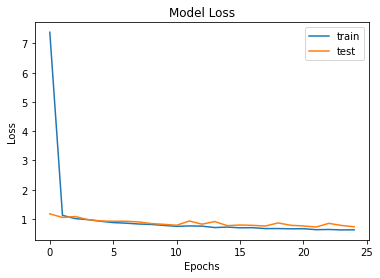

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

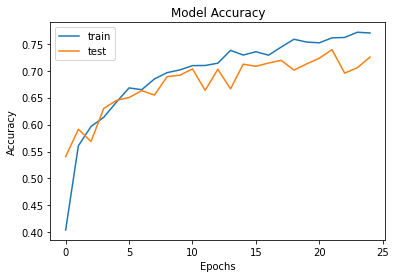

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()